In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import dateutil.parser as dparser
%matplotlib notebook
import rasterio
from rasterio.plot import show
from mpl_toolkits.mplot3d import Axes3D

In [2]:

from pyproj import Transformer

# Convert the ground track to imagery coordinate system
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32617")


<IPython.core.display.Javascript object>


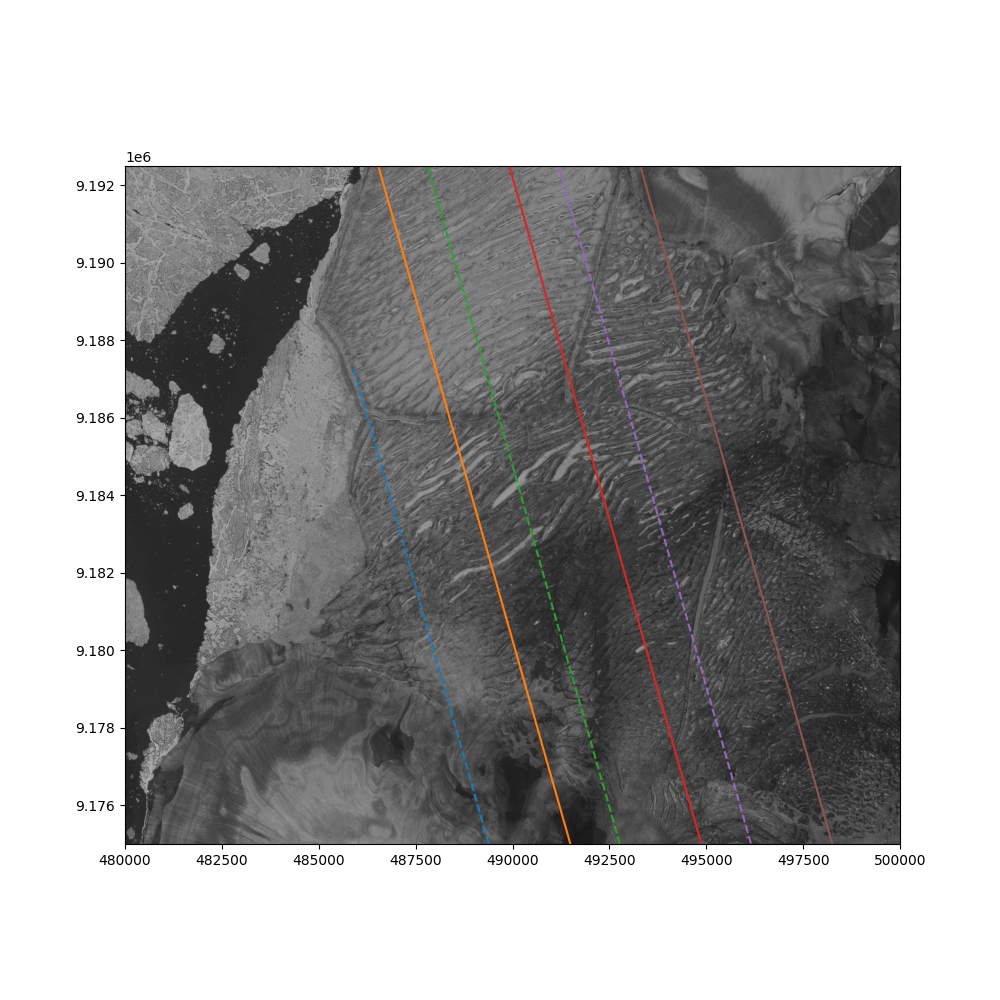

<IPython.core.display.Javascript object>


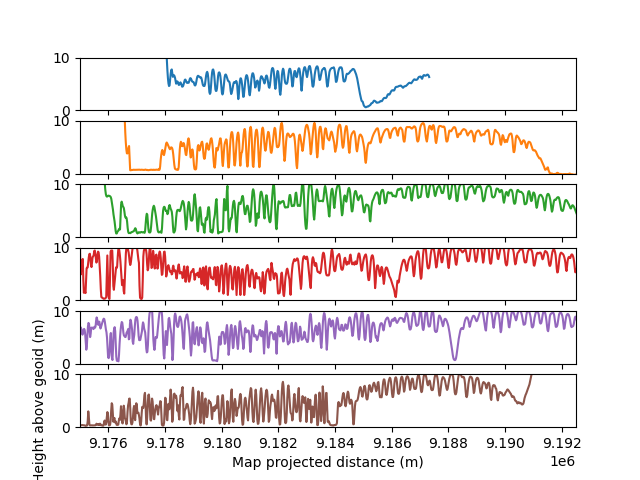

/gt1r 2019-01-03 16:04:04.902423+00:00
/gt1r 2020-01-01 22:43:11.938372+00:00
/gt2r 2019-01-03 16:04:04.902423+00:00
/gt2r 2020-01-01 22:43:11.938372+00:00
/gt3r 2019-01-03 16:04:04.902423+00:00
/gt3r 2020-01-01 22:43:11.938372+00:00


(9175000.0, 9192500.0)

In [9]:
# For the plot with imagery
fig2,ax2 = plt.subplots(figsize=(10,10))
image_file = '/Users/lipovsky/Downloads/Planet_20200729_SR.tif'
sat_data = rasterio.open(image_file)
show(sat_data,cmap="gray")

# Domain bounds in y direction
ymax = 9.1925e6
ymin = 9.175e6

# For plot of each file, each track
fig,ax = plt.subplots(6,1,sharex=True)
files=('/Users/lipovsky/is2-data/milne/processed_ATL06_20190103160405_00950204_003_01.h5',
      '/Users/lipovsky/is2-data/milne/processed_ATL06_20200101224312_00950604_003_01.h5')

for i in range(1,4):
    for j in range(0,2):
        fid = h5py.File(files[j], mode='r')
        if fid['gt1l'].attrs['atlas_beam_type'] == 'strong':
            strong_id = 'l'
        else:
            strong_id = 'r'
        
        xatc = fid['/gt%i%s/land_ice_segments/ground_track/x_atc'%(i,strong_id)][:]
        h = fid['/gt%i%s/land_ice_segments/h_li'%(i,strong_id)][:]
        geoid = fid['/gt%i%s/land_ice_segments/dem/geoid_h'%(i,strong_id)][:]
        h_lat = fid['/gt%i%s/land_ice_segments/latitude'%(i,strong_id)][:]
        h_lon = fid['/gt%i%s/land_ice_segments/longitude'%(i,strong_id)][:]
        geoid = fid['/gt%i%s/land_ice_segments/dem/geoid_h'%(i,strong_id)][:]
        time = dparser.parse( fid['/ancillary_data/data_start_utc'][0] ,fuzzy=True )

        [h_x,h_y] = transformer.transform( h_lat , h_lon )
        if j==0:
            ax2.plot(h_x[h_y>ymin],h_y[h_y>ymin],'--')
        else:
            ax2.plot(h_x[h_y>ymin],h_y[h_y>ymin],'-')
        yrange = (h_y>ymin) & (h_y<ymax)
        
        ind = 2*(i-1) + j
        ax[ind].plot(h_y,h-geoid,label=time,color="C{}".format(ind))
        ax[ind].set_ylim([0, 10])
        ax[ind].set_xlim([ymin, ymax])
        print('/gt%i%s %s'%(i,strong_id,time))
#         ax[ind].legend()
        
#         ax3d.scatter(h_x,h_y,h-geoid,'.')
#         ax3d.set_zlim([0, 20])
        
#         ax2.scatter(h_x[yrange],h_y[yrange],
#                            c=(h[yrange]-geoid[yrange]),vmin=0,vmax=10,
#                            s=1)



plt.xlabel('Map projected distance (m)')
plt.ylabel('Height above geoid (m)')


ax2.set_xlim((4.8e5,5e5))
ax2.set_ylim((9.175e6,9.1925e6))

<IPython.core.display.Javascript object>


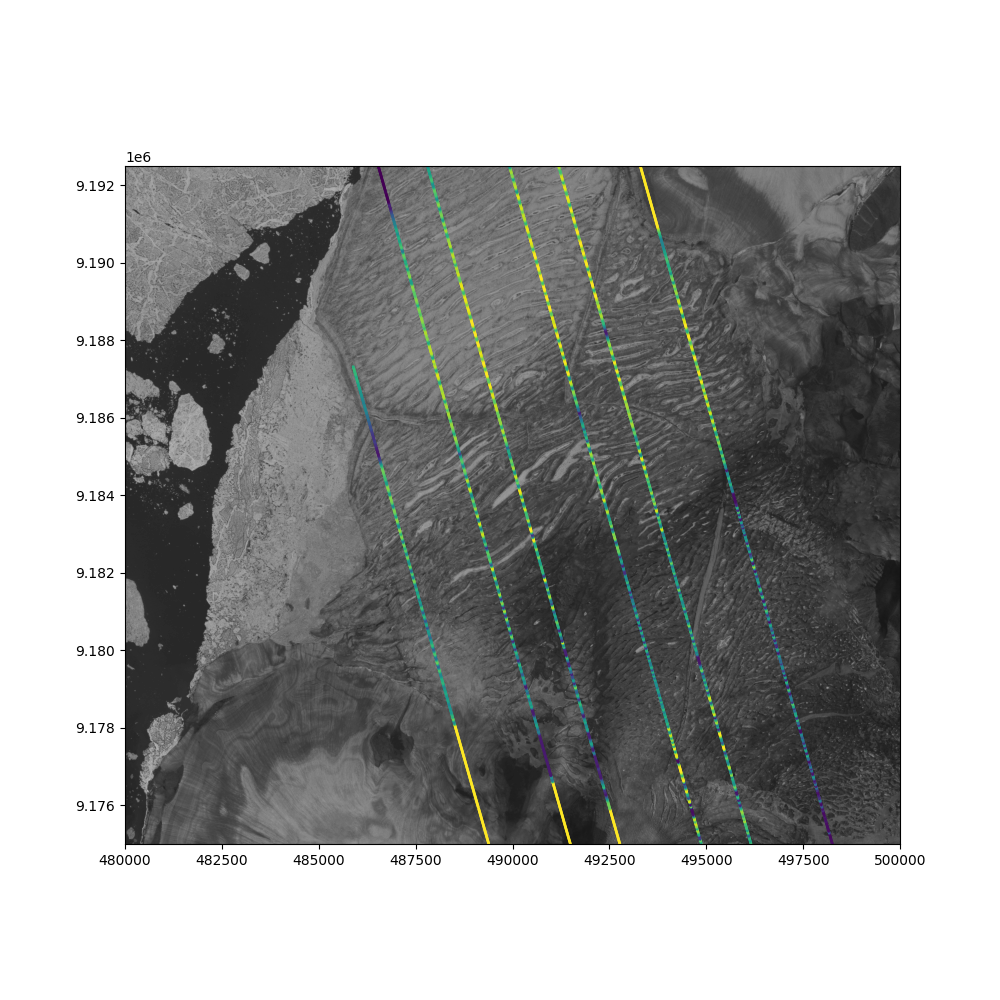

/gt1r 2019-01-03 16:04:04.902423+00:00
/gt1r 2020-01-01 22:43:11.938372+00:00
/gt2r 2019-01-03 16:04:04.902423+00:00
/gt2r 2020-01-01 22:43:11.938372+00:00
/gt3r 2019-01-03 16:04:04.902423+00:00
/gt3r 2020-01-01 22:43:11.938372+00:00


(9175000.0, 9192500.0)

In [8]:
# For the plot with imagery
fig3,ax3 = plt.subplots(figsize=(10,10))
image_file = '/Users/lipovsky/Downloads/Planet_20200729_SR.tif'
sat_data = rasterio.open(image_file)
show(sat_data,cmap="gray")

# Domain bounds in y direction
ymax = 9.1925e6
ymin = 9.175e6

# For plot of each file, each track
files=('/Users/lipovsky/is2-data/milne/processed_ATL06_20190103160405_00950204_003_01.h5',
      '/Users/lipovsky/is2-data/milne/processed_ATL06_20200101224312_00950604_003_01.h5')

for i in range(1,4):
    for j in range(0,2):
        fid = h5py.File(files[j], mode='r')
        if fid['gt1l'].attrs['atlas_beam_type'] == 'strong':
            strong_id = 'l'
        else:
            strong_id = 'r'
        
        xatc = fid['/gt%i%s/land_ice_segments/ground_track/x_atc'%(i,strong_id)][:]
        h = fid['/gt%i%s/land_ice_segments/h_li'%(i,strong_id)][:]
        geoid = fid['/gt%i%s/land_ice_segments/dem/geoid_h'%(i,strong_id)][:]
        h_lat = fid['/gt%i%s/land_ice_segments/latitude'%(i,strong_id)][:]
        h_lon = fid['/gt%i%s/land_ice_segments/longitude'%(i,strong_id)][:]
        geoid = fid['/gt%i%s/land_ice_segments/dem/geoid_h'%(i,strong_id)][:]
        time = dparser.parse( fid['/ancillary_data/data_start_utc'][0] ,fuzzy=True )

        [h_x,h_y] = transformer.transform( h_lat , h_lon )
        yrange = (h_y>ymin) & (h_y<ymax)
        
        print('/gt%i%s %s'%(i,strong_id,time))
        
        ax3.scatter(h_x[yrange],h_y[yrange],
                           c=(h[yrange]-geoid[yrange]),vmin=0,vmax=10,
                           s=1)

ax3.set_xlim((4.8e5,5e5))
ax3.set_ylim((9.175e6,9.1925e6))

In [10]:
np.mean(geoid)

17.276503